# AgenticAI Support Bot Demo

This notebook demonstrates the functionality of the customized chatbot, including:
1. Graph Visualization
2. Factual Question Handling (Dictionary Search)
3. Conversational Handling
4. Short-term Memory

In [1]:
import sys
import os

# Add the parent directory to sys.path to import modules from the project root
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from graph import graph
from IPython.display import Image, display

## 1. Visualize the Graph
This shows the structure of the LangGraph agent.

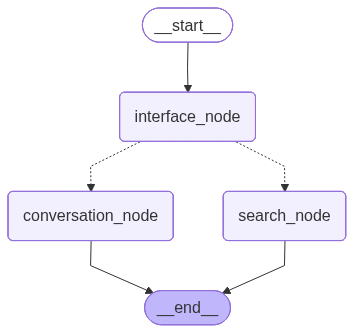

In [2]:
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception as e:
    print(f"Could not draw graph: {e}")

## 2. Test the Bot
We will define a helper function to simulate a chat session.

In [3]:
def chat(message, thread_id="demo_thread"):
    config = {"configurable": {"thread_id": thread_id}}
    response = graph.invoke({"messages": [("user", message)]}, config=config)
    print(f"User: {message}")
    print(f"Bot:  {response['messages'][-1].content}\n")

### Scenario 1: Factual Query
Asking a question that should trigger the dictionary search tool.

In [4]:
chat("What is LangGraph?", thread_id="thread_1")

User: What is LangGraph?
Bot:  LangGraph is a library for building stateful, multi-actor applications with LLMs, built on top of LangChain.



### Scenario 2: Conversational Query
Engaging in normal small talk.

In [5]:
chat("Hello! How are you doing today?", thread_id="thread_2")

User: Hello! How are you doing today?
Bot:  Hello! I’m doing great—thanks for asking. How about you? Anything interesting on your mind today?



### Scenario 3: Memory Test
Testing if the bot remembers information within the same thread.

In [6]:
chat("My name is Muskan.", thread_id="thread_memory")
chat("What is my name?", thread_id="thread_memory")

User: My name is Muskan.
Bot:  Nice to meet you, Muskan! How can I help you today?

User: What is my name?
Bot:  Your name is Muskan.

